# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [80]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df=pd.DataFrame(df)
df_new=df.copy()
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [83]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [84]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [85]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [86]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [87]:
print(df.isna().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [88]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [89]:
#Label Encoding for trip type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['route'] = label_encoder.fit_transform(df['route'])
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])

In [90]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


In [91]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

y = df['booking_complete']  # target column to predict

#dependednt variables
selected_features = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
X = df[selected_features] #Created a new data frame with the selected features

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the data X, y
dt_classifier.fit(X, y)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Print the feature importances
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance}")


num_passengers: 0.047003238789762425
sales_channel: 0.01592251030683656
trip_type: 0.0013307879248817588
purchase_lead: 0.22875522762368436
length_of_stay: 0.11484834013003345
flight_hour: 0.1427522296632831
flight_day: 0.09050083330224656
route: 0.14944201977447932
booking_origin: 0.10182667357413464
wants_extra_baggage: 0.01385932358658421
wants_preferred_seat: 0.01610623747698561
wants_in_flight_meals: 0.023314408914055933
flight_duration: 0.05433816893303203


In [92]:
import numpy as np

# Select the top 5 features based on importance scores
num_features_to_select = 7
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:][::-1]
top_features = [selected_features[i] for i in top_feature_indices]

print("Top Features:", top_features)

Top Features: ['purchase_lead', 'route', 'flight_hour', 'length_of_stay', 'booking_origin', 'flight_day', 'flight_duration']


In [93]:
#Using the same decision tree classifier to predict the outcome
# Use the trained Decision Tree classifier to make predictions
#For that changing the dataset to new with the top 7 features only.

selected_columns = ['purchase_lead', 'route', 'flight_hour', 'length_of_stay', 'booking_origin', 'flight_day', 'flight_duration', 'booking_complete']

# Subset the DataFrame to include only the selected columns
subset_df = df[selected_columns]
subset_df.head()


,purchase_lead,route,flight_hour,length_of_stay,booking_origin,flight_day,flight_duration,booking_complete
0,262,0,7,19,61,6,5.52,0
1,112,0,3,20,61,6,5.52,0
2,243,0,17,22,36,3,5.52,0
3,96,0,4,31,61,6,5.52,0
4,68,0,15,22,36,3,5.52,0


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform 5-fold cross-validation (you can change the number of folds)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.8509 0.4996 0.2297 0.3706 0.514 ]
Mean CV Score: 0.49296000000000006


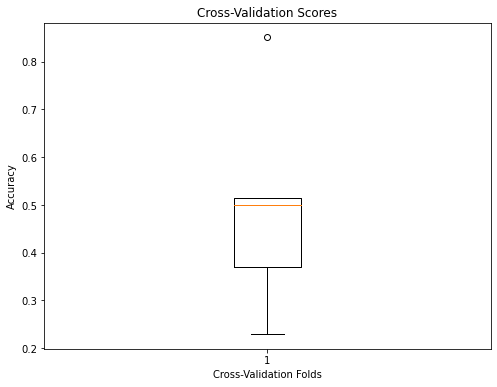

In [102]:
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xlabel('Cross-Validation Folds')
plt.show()

In [101]:
# Assuming you have new data stored in a variable named 'new_data'
# Replace 'new_data' with your actual new data

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to your original data
rf_classifier.fit(X, y)

# Make predictions on the new data
new_data_predictions = rf_classifier.predict(new_data)

# 'new_data_predictions' will contain the predicted outcomes for the new data


NameError: name 'new_data' is not defined

In [95]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7809
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8520
           1       0.28      0.32      0.30      1480

    accuracy                           0.78     10000
   macro avg       0.58      0.59      0.59     10000
weighted avg       0.79      0.78      0.79     10000



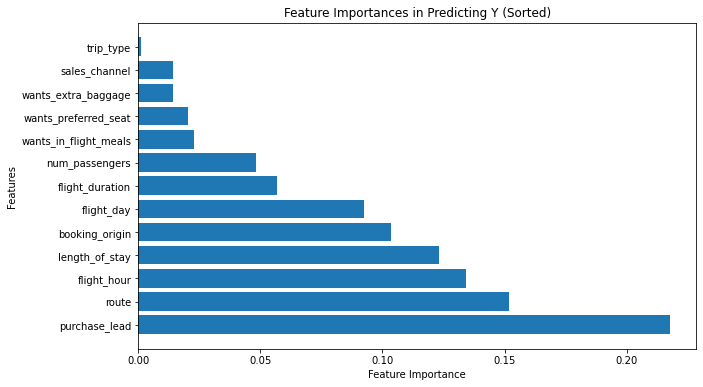

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Decision Tree model
feature_importances = dt_classifier.feature_importances_
# Get the names of the features
feature_names = X.columns  # Replace 'X' with your feature DataFrame

# Sort features and importance scores in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar chart to visualize sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Predicting Y (Sorted)')

# Show the chart
plt.show()
